<a href="https://colab.research.google.com/github/merdogan97/DAwPY/blob/main/DAwPy_S(5_6)_(Groupby%2CAggregation%2CDataFrame_Operations%2CPivot_Tables%2CStack)_26_01_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# **Pandas Lesson, Session - 5**

# **Basic aggregation methods:**

* ``count()``
* ``mean()``
* ``median()``
* ``min()``
* ``max()``
* ``std()``
* ``var()``
* ``sum()``
* ``idxmin()``
* ``idxmax()``
* ``corr()``

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
np.random.seed(42)
df = pd.DataFrame(np.random.randint(0,100,size=(7,5)),
                  columns=["x1","x2","x3","x4","x5"])

In [3]:
df

,x1,x2,x3,x4,x5
0,51,92,14,71,60
1,20,82,86,74,74
2,87,99,23,2,21
3,52,1,87,29,37
4,1,63,59,20,32
5,75,57,21,88,48
6,90,58,41,91,59


In [4]:
df.count()  # tamamına uyg. ve her süt da kaç satır var sütunda 

x1    7
x2    7
x3    7
x4    7
x5    7
dtype: int64

In [5]:
df.x1.count()

7

In [6]:
df.mean()

x1    53.714286
x2    64.571429
x3    47.285714
x4    53.571429
x5    47.285714
dtype: float64

In [7]:
df.x2.mean()

64.57142857142857

In [9]:
df.median()

x1    52.0
x2    63.0
x3    41.0
x4    71.0
x5    48.0
dtype: float64

In [8]:
df.x3.median()

41.0

In [10]:
df.min()

x1     1
x2     1
x3    14
x4     2
x5    21
dtype: int64

In [11]:
df.max()

x1    90
x2    99
x3    87
x4    91
x5    74
dtype: int64

In [12]:
df.x1.max()

90

In [13]:
df.idxmax()# her bir sütundaki max değerinin index değ.verir
# df.argmax()  çalışmaz serilerde ve listelerde uyglanır . df 'de indx max ugy.

x1    6
x2    2
x3    3
x4    6
x5    1
dtype: int64

In [14]:
df.x2.idxmax()

2

In [ ]:
df.x2.argmax()

2

In [15]:
df.std()

x1    33.673502
x2    32.623392
x3    30.663302
x4    35.818325
x5    18.454577
dtype: float64

In [ ]:
df.x4.std()

35.81832465306524

In [19]:
df[["x1","x2"]].std() 2 tütuna da bakabiliriz

SyntaxError: ignored

In [16]:
# tek sutun dediğiniz aslında zaten series oluyor

In [21]:
df.var()

x1    1133.904762
x2    1064.285714
x3     940.238095
x4    1282.952381
x5     340.571429
dtype: float64

In [20]:
df.sum()

x1    376
x2    452
x3    331
x4    375
x5    331
dtype: int64

In [22]:
df.sum(axis=0) # aynısısnı verir

x1    376
x2    452
x3    331
x4    375
x5    331
dtype: int64

In [23]:
df.sum(axis=1) # her bir sütunun 1. satırını topluyor

0    288
1    336
2    232
3    206
4    175
5    289
6    339
dtype: int64

In [24]:
df.x1.sum()

376

In [25]:
df["x1"].sum()

376

# **Group by  & Aggregation**

# **DataFrame.groupby()**

# The ``groupby`` method allows you to group rows of data together and call aggregate functions

# Now you can use the ``.groupby()`` method to group rows together based off of a column name. This will create a DataFrameGroupBy object:

In [26]:
df=sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [27]:
# ************gruplandırma genellikle kategorik veriler üzzerinde yapılır.*****

In [28]:
df.groupby("species") # df oluşturdu ama görüntü vermez. arkasını agg kodu yazmalıyım 

In [29]:
df.groupby("species").mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [30]:
df.groupby("species").describe()

sepal_length                               ... petal_width                    
                  count   mean       std  min    25%  ...         min  25%  50%  75%  max
species                                               ...                                
setosa             50.0  5.006  0.352490  4.3  4.800  ...         0.1  0.2  0.2  0.3  0.6
versicolor         50.0  5.936  0.516171  4.9  5.600  ...         1.0  1.2  1.3  1.5  1.8
virginica          50.0  6.588  0.635880  4.9  6.225  ...         1.4  1.8  2.0  2.3  2.5

[3 rows x 32 columns]

In [31]:
df.groupby("species").describe().T

species                setosa  versicolor  virginica
sepal_length count  50.000000   50.000000  50.000000
             mean    5.006000    5.936000   6.588000
             std     0.352490    0.516171   0.635880
             min     4.300000    4.900000   4.900000
             25%     4.800000    5.600000   6.225000
             50%     5.000000    5.900000   6.500000
             75%     5.200000    6.300000   6.900000
             max     5.800000    7.000000   7.900000
sepal_width  count  50.000000   50.000000  50.000000
             mean    3.428000    2.770000   2.974000
             std     0.379064    0.313798   0.322497
             min     2.300000    2.000000   2.200000
             25%     3.200000    2.525000   2.800000
             50%     3.400000    2.800000   3.000000
             75%     3.675000    3.000000   3.175000
             max     4.400000    3.400000   3.800000
petal_length count  50.000000   50.000000  50.000000
             mean    1.462000    4.260000   5.552000
             std     0.173664    0.469911   0.551895
             min     1.000000    3.000000   4.500000
             25%     1.400000    4.000000   5.100000
             50%     1.500000    4.350000   5.550000
             75%     1.575000    4.600000   5.875000
             max     1.900000    5.100000   6.900000
petal_width  count  50.000000   50.000000  50.000000
             mean    0.246000    1.326000   2.026000
             std     0.105386    0.197753   0.274650
             min     0.100000    1.000000   1.400000
             25%     0.200000    1.200000   1.800000
             50%     0.200000    1.300000   2.000000
             75%     0.300000    1.500000   2.300000
             max     0.600000    1.800000   2.500000

In [ ]:
df.groupby("species").describe().sum()

sepal_length  count    150.000000
              mean      17.530000
              std        1.504540
              min       14.100000
              25%       16.625000
              50%       17.400000
              75%       18.400000
              max       20.700000
sepal_width   count    150.000000
              mean       9.172000
              std        1.015359
              min        6.500000
              25%        8.525000
              50%        9.200000
              75%        9.850000
              max       11.600000
petal_length  count    150.000000
              mean      11.274000
              std        1.195470
              min        8.500000
              25%       10.500000
              50%       11.400000
              75%       12.050000
              max       13.900000
petal_width   count    150.000000
              mean       3.598000
              std        0.577788
              min        2.500000
              25%        3.200000
              

In [ ]:
df.groupby("species")["sepal_length"].sum()

species
setosa        250.3
versicolor    296.8
virginica     329.4
Name: sepal_length, dtype: float64

In [ ]:
df.groupby("species")[["sepal_length"]].sum() # df olması için [[]]

,sepal_length
species,
setosa,250.3
versicolor,296.8
virginica,329.4


In [ ]:
df.groupby("species")[["sepal_length", "sepal_width"]].sum()

,sepal_length,sepal_width
species,,
setosa,250.3,171.4
versicolor,296.8,138.5
virginica,329.4,148.7


In [32]:
data = {'Company':['GOOG', 'GOOG', 'MSFT', 'MSFT', 'GOOG', 'MSFT', 'GOOG', 'MSFT'],
        'Department':['HR', 'IT', 'IT', 'HR', 'HR', 'IT', 'IT', 'HR'],
        'Person':['Sam', 'Charlie', 'Amy', 'Vanessa', 'Carl', 'Sarah', 'Tom', 'Terry'],
        'Age':[30, 28, 35, 40, 42, 25, 32, 48],
        'Sales':[200, 120, 340, 124, 243, 350, 180, 220]}

In [33]:
df1 = pd.DataFrame(data)
df1           # 3 object süt., 2 numeric süt. var

,Company,Department,Person,Age,Sales
0,GOOG,HR,Sam,30,200
1,GOOG,IT,Charlie,28,120
2,MSFT,IT,Amy,35,340
3,MSFT,HR,Vanessa,40,124
4,GOOG,HR,Carl,42,243
5,MSFT,IT,Sarah,25,350
6,GOOG,IT,Tom,32,180
7,MSFT,HR,Terry,48,220


In [34]:
df1.groupby("Company").mean()

,Age,Sales
Company,,
GOOG,33.0,185.75
MSFT,37.0,258.50


In [35]:
df1.groupby("Company")[["Sales"]].mean()

,Sales
Company,
GOOG,185.75
MSFT,258.50


In [36]:
df1.groupby(["Company", "Department"]).mean() # multi index bir durum

Age  Sales
Company Department             
GOOG    HR          36.0  221.5
        IT          30.0  150.0
MSFT    HR          44.0  172.0
        IT          30.0  345.0

In [37]:
df1.groupby(["Company", "Department"])[["Sales"]].mean() # sales'lara bakalım

Sales
Company Department       
GOOG    HR          221.5
        IT          150.0
MSFT    HR          172.0
        IT          345.0

In [38]:
by_comp = df1.groupby("Company")
by_comp

In [39]:
by_comp.mean() # yukarıdaki operasyonlaırn hepsini yapabiliriz.

,Age,Sales
Company,,
GOOG,33.0,185.75
MSFT,37.0,258.50


# **DataFrame/Series Operations**

- ### `.aggregate()/agg()`
- ### `.filter()`
- ### `.transform()`
- ### `.apply()`
- ### `.applymap()`
- ### `.map()`
- ### `.pivot() & .pivot_table()`
- ### `.stack() & .unstack()`

## ``.aggregate()/agg()``

# **DataFrame.agg()**

In [40]:
df2 = pd.DataFrame({'groups': ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C'],
                   'var1': [10, 23, 33, 22, 11, 99, 76, 84, 45],
                   'var2': [100, 253, 333, 262, 111, 969, 405, 578, 760]})
df2

,groups,var1,var2
0,A,10,100
1,B,23,253
2,C,33,333
3,A,22,262
4,B,11,111
5,C,99,969
6,A,76,405
7,B,84,578
8,C,45,760


In [41]:
df2.agg([sum, min]) # ilgili sütunların hepsine uygular

,groups,var1,var2
sum,ABCABCABC,403,3771
min,A,10,100


In [42]:
df2[["var1", "var2"]].agg([sum,min])

,var1,var2
sum,403,3771
min,10,100


In [ ]:
df2.agg({"var1":[sum], "var2":[min]})

,var1,var2
min,NaN,100.0
sum,403.0,NaN


In [ ]:
df2.agg({"var1":[sum, np.mean], "var2":[min, max]})

,var1,var2
max,NaN,969.0
mean,44.777778,NaN
min,NaN,100.0
sum,403.000000,NaN


# **DataFrame.groupby().agg()**

In [ ]:
df2.groupby("groups").agg([np.mean, np.median, np.max]) # np.max = array max olur

var1                    var2            
             mean median amax        mean median amax
groups                                               
A       36.000000     22   76  255.666667    262  405
B       39.333333     23   84  314.000000    253  578
C       59.000000     45   99  687.333333    760  969

In [ ]:
df2.groupby("groups").agg([np.mean, np.median, max])

var1                   var2            
             mean median max        mean median  max
groups                                              
A       36.000000     22  76  255.666667    262  405
B       39.333333     23  84  314.000000    253  578
C       59.000000     45  99  687.333333    760  969

In [ ]:
df2.groupby("groups").agg([np.mean, np.median, np.max]).T

groups                A           B           C
var1 mean     36.000000   39.333333   59.000000
     median   22.000000   23.000000   45.000000
     amax     76.000000   84.000000   99.000000
var2 mean    255.666667  314.000000  687.333333
     median  262.000000  253.000000  760.000000
     amax    405.000000  578.000000  969.000000

In [ ]:
df2.groupby("groups").agg({"var1":[min,max], "var2":"median"})

var1       var2
        min max median
groups                
A        10  76    262
B        11  84    253
C        33  99    760

In [ ]:
df2.groupby("groups")["var1"].agg([min, max])

,min,max
groups,,
A,10,76
B,11,84
C,33,99


# **.filter()**

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.filter.html

https://www.sharpsightlabs.com/blog/pandas-filter/

# **DataFrame.filter()**

In [ ]:
df2

,groups,var1,var2
0,A,10,100
1,B,23,253
2,C,33,333
3,A,22,262
4,B,11,111
5,C,99,969
6,A,76,405
7,B,84,578
8,C,45,760


In [ ]:
df2.filter(["groups", "var1"]) # == df2[["groups","var1"]]


,groups,var1
0,A,10
1,B,23
2,C,33
3,A,22
4,B,11
5,C,99
6,A,76
7,B,84
8,C,45


In [ ]:
df2[["groups","var1"]]

,groups,var1
0,A,10
1,B,23
2,C,33
3,A,22
4,B,11
5,C,99
6,A,76
7,B,84
8,C,45


In [ ]:
df2.filter(regex="^var", axis=1) # var.. ile başlayan sütun isimleri geldi(150 sütunlu bir dataframe gelirse, vs..)

,var1,var2
0,10,100
1,23,253
2,33,333
3,22,262
4,11,111
5,99,969
6,76,405
7,84,578
8,45,760


In [ ]:
df2.filter(like="var", axis=1) # içinde var geçen sütunları getiri

,var1,var2
0,10,100
1,23,253
2,33,333
3,22,262
4,11,111
5,99,969
6,76,405
7,84,578
8,45,760


In [ ]:
df2.filter(like="5", axis=0)

,groups,var1,var2
5,C,99,969


# **DataFrame.groupby().filter()**

In [ ]:
df2.groups.unique()

array(['A', 'B', 'C'], dtype=object)

In [ ]:
df2.groupby("groups").mean()

,var1,var2
groups,,
A,36.000000,255.666667
B,39.333333,314.000000
C,59.000000,687.333333


In [ ]:
def filter_func(x):
    return x["var1"].mean() > 39

In [ ]:
df2.groupby("groups").filter(filter_func) # 39'den büyükler  A da yok

,groups,var1,var2
1,B,23,253
2,C,33,333
4,B,11,111
5,C,99,969
7,B,84,578
8,C,45,760


In [ ]:
df2.groupby("groups").sum() 

,var1,var2
groups,,
A,108,767
B,118,942
C,177,2062


In [ ]:
df2.groupby("groups").filter(lambda x: x["var2"].sum()<800) # 8002den küçükler sadece A da var

,groups,var1,var2
0,A,10,100
3,A,22,262
6,A,76,405


## .transform()

Python’s Transform function returns a self-produced dataframe with transformed values after applying the function specified in its parameter. This dataframe has the same length as the passed dataframe.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transform.html

https://www.analyticsvidhya.com/blog/2020/03/understanding-transform-function-python/

### DataFrame.transform()

In [43]:
df2

,groups,var1,var2
0,A,10,100
1,B,23,253
2,C,33,333
3,A,22,262
4,B,11,111
5,C,99,969
6,A,76,405
7,B,84,578
8,C,45,760


In [46]:
df_num= df2.iloc[:,1:]
df_num

,var1,var2
0,10,100
1,23,253
2,33,333
3,22,262
4,11,111
5,99,969
6,76,405
7,84,578
8,45,760


In [47]:
df_num.transform(lambda x: x+10)
             

,var1,var2
0,20,110
1,33,263
2,43,343
3,32,272
4,21,121
5,109,979
6,86,415
7,94,588
8,55,770


In [48]:
    df_num + 10

,var1,var2
0,20,110
1,33,263
2,43,343
3,32,272
4,21,121
5,109,979
6,86,415
7,94,588
8,55,770


In [49]:
df_num.transform(lambda x : (x-x.mean()) / x.std())

,var1,var2
0,-1.040605,-1.078044
1,-0.651625,-0.560989
2,-0.352409,-0.290633
3,-0.681547,-0.530573
4,-1.010684,-1.040870
5,1.622413,1.858697
6,0.934218,-0.047312
7,1.173590,0.537332
8,0.006649,1.152392


In [50]:
df_num.var1.transform([np.sqrt, np.exp])

,sqrt,exp
0,3.162278,2.202647e+04
1,4.795832,9.744803e+09
2,5.744563,2.146436e+14
3,4.690416,3.584913e+09
4,3.316625,5.987414e+04
5,9.949874,9.889030e+42
6,8.717798,1.014800e+33
7,9.165151,3.025077e+36
8,6.708204,3.493427e+19


### DataFrame.groupby().transform()

In [51]:
df2

,groups,var1,var2
0,A,10,100
1,B,23,253
2,C,33,333
3,A,22,262
4,B,11,111
5,C,99,969
6,A,76,405
7,B,84,578
8,C,45,760


In [53]:
df2.groupby("groups")["var1"].mean()

groups
A    36.000000
B    39.333333
C    59.000000
Name: var1, dtype: float64

In [55]:
df2.groupby("groups")["var1"].transform("mean")

0    36.000000
1    39.333333
2    59.000000
3    36.000000
4    39.333333
5    59.000000
6    36.000000
7    39.333333
8    59.000000
Name: var1, dtype: float64

In [56]:
df2["var1_mean_transform"] = df2.groupby("groups")["var1"].transform("mean")
df2

,groups,var1,var2,var1_mean_transform
0,A,10,100,36.000000
1,B,23,253,39.333333
2,C,33,333,59.000000
3,A,22,262,36.000000
4,B,11,111,39.333333
5,C,99,969,59.000000
6,A,76,405,36.000000
7,B,84,578,39.333333
8,C,45,760,59.000000


In [57]:
df2["var2_median_transform"] = df2.groupby("groups")["var2"].transform("median")
df2

,groups,var1,var2,var1_mean_transform,var2_median_transform
0,A,10,100,36.000000,262
1,B,23,253,39.333333,253
2,C,33,333,59.000000,760
3,A,22,262,36.000000,262
4,B,11,111,39.333333,253
5,C,99,969,59.000000,760
6,A,76,405,36.000000,262
7,B,84,578,39.333333,253
8,C,45,760,59.000000,760


# **Pandas Lesson, Session - 6**

# **.apply()**

# **Series.apply() - df["col"].apply()**

In [58]:
df3 = pd.DataFrame({'col1':[1,2,3,4],'col2':[444,555,666,444],'col3':['abc','def','ghi','xyz']})
df3

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


In [59]:
def squared(x):
    return x**2

In [60]:
df3["col1"].apply(squared)

0     1
1     4
2     9
3    16
Name: col1, dtype: int64

In [62]:
df3["col2"].apply(np.log)

0    6.095825
1    6.318968
2    6.501290
3    6.095825
Name: col2, dtype: float64

In [63]:
df3["col3"].apply(len)

0    3
1    3
2    3
3    3
Name: col3, dtype: int64

In [ ]:
df3["col2"].apply(lambda x: x[0]*3)

In [71]:
df3[“col2”].apply(lambda x :“high” if x>500 else “low”)

SyntaxError: ignored

In [70]:
df2

,groups,var1,var2,var1_mean_transform,var2_median_transform
0,A,10,100,36.000000,262
1,B,23,253,39.333333,253
2,C,33,333,59.000000,760
3,A,22,262,36.000000,262
4,B,11,111,39.333333,253
5,C,99,969,59.000000,760
6,A,76,405,36.000000,262
7,B,84,578,39.333333,253
8,C,45,760,59.000000,760


In [72]:
df2.drop(["var1_mean_transform", "var2_median_transform"], axis=1, inplace=True)
df2


,groups,var1,var2
0,A,10,100
1,B,23,253
2,C,33,333
3,A,22,262
4,B,11,111
5,C,99,969
6,A,76,405
7,B,84,578
8,C,45,760


In [73]:
df2.apply(np.sum, axis=0)

groups    ABCABCABC
var1            403
var2           3771
dtype: object

In [ ]:
# df2.apply(np.sum, axis=1)  # hata verir sayısal değeri yan yan yopamaya çalışır olmaz 

In [75]:
df_num.apply(np.sum, axis=0)

var1     403
var2    3771
dtype: int64

In [76]:
df_num.apply(np.sum, axis=1) # yanyana topladı

0     110
1     276
2     366
3     284
4     122
5    1068
6     481
7     662
8     805
dtype: int64

In [77]:

df2. groupby("groups").mean()

,var1,var2
groups,,
A,36.000000,255.666667
B,39.333333,314.000000
C,59.000000,687.333333


In [80]:

df2. groupby("groups").apply(np.mean) # yukarıdakinin aynısı transform da aynı .Bu nedenle apply mean çok kullanışlı değil.

,var1,var2
groups,,
A,36.000000,255.666667
B,39.333333,314.000000
C,59.000000,687.333333


In [ ]:
df2.groupby(“groups”).mean()#bir apply grup by uygulamak mantikli degil aynini veriyor
#transformdan farki bu

# **DataFrame.apply()**

# **DataFrame.applymap()**

applymap() is only available in DataFrame and used for element-wise operation across the whole DataFrame. It has been optimized and some cases work **much faster than apply()**

applymap() method only works on a pandas dataframe where function is applied on every element individually. apply() method can be applied both to series and dataframes where function can be applied both series and individual elements based on the type of function provided.

In [81]:
df_num

,var1,var2
0,10,100
1,23,253
2,33,333
3,22,262
4,11,111
5,99,969
6,76,405
7,84,578
8,45,760


In [83]:
df_num.applymap(lambda x: x*5)
# df_num.apply(lambda x: x*5)
# de_num*5

,var1,var2
0,50,500
1,115,1265
2,165,1665
3,110,1310
4,55,555
5,495,4845
6,380,2025
7,420,2890
8,225,3800


In [84]:
df_num.applymap(lambda x: len(str(x*5)))

,var1,var2
0,2,3
1,3,4
2,3,4
3,3,4
4,2,3
5,3,4
6,3,4
7,3,4
8,3,4


In [85]:
df_num.apply(lambda x: len(str(x*5))) # apply yapmadı. biz df herbirine ulşamak istr. applymap daha kullanışlı

var1    105
var2    114
dtype: int64

In [ ]:
#apply toplu görünüm için iyi applymap cell olarak bakmak istediğimizde iyi benim anladığım

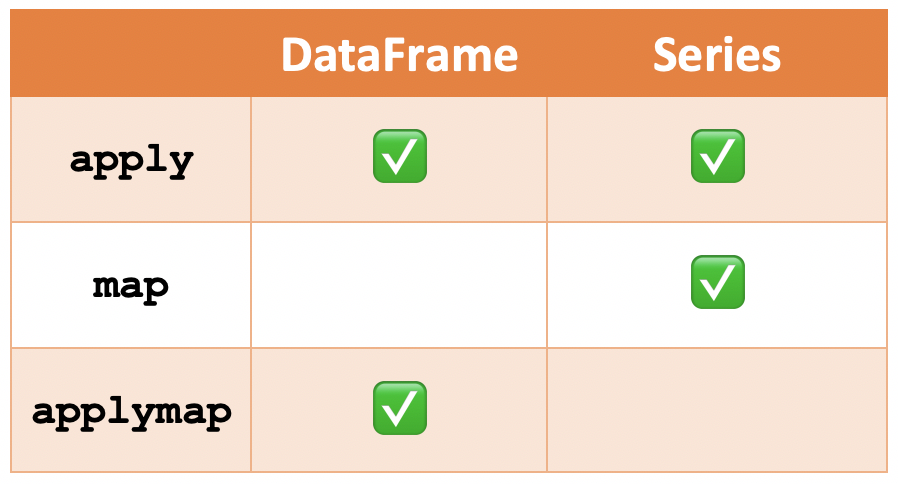

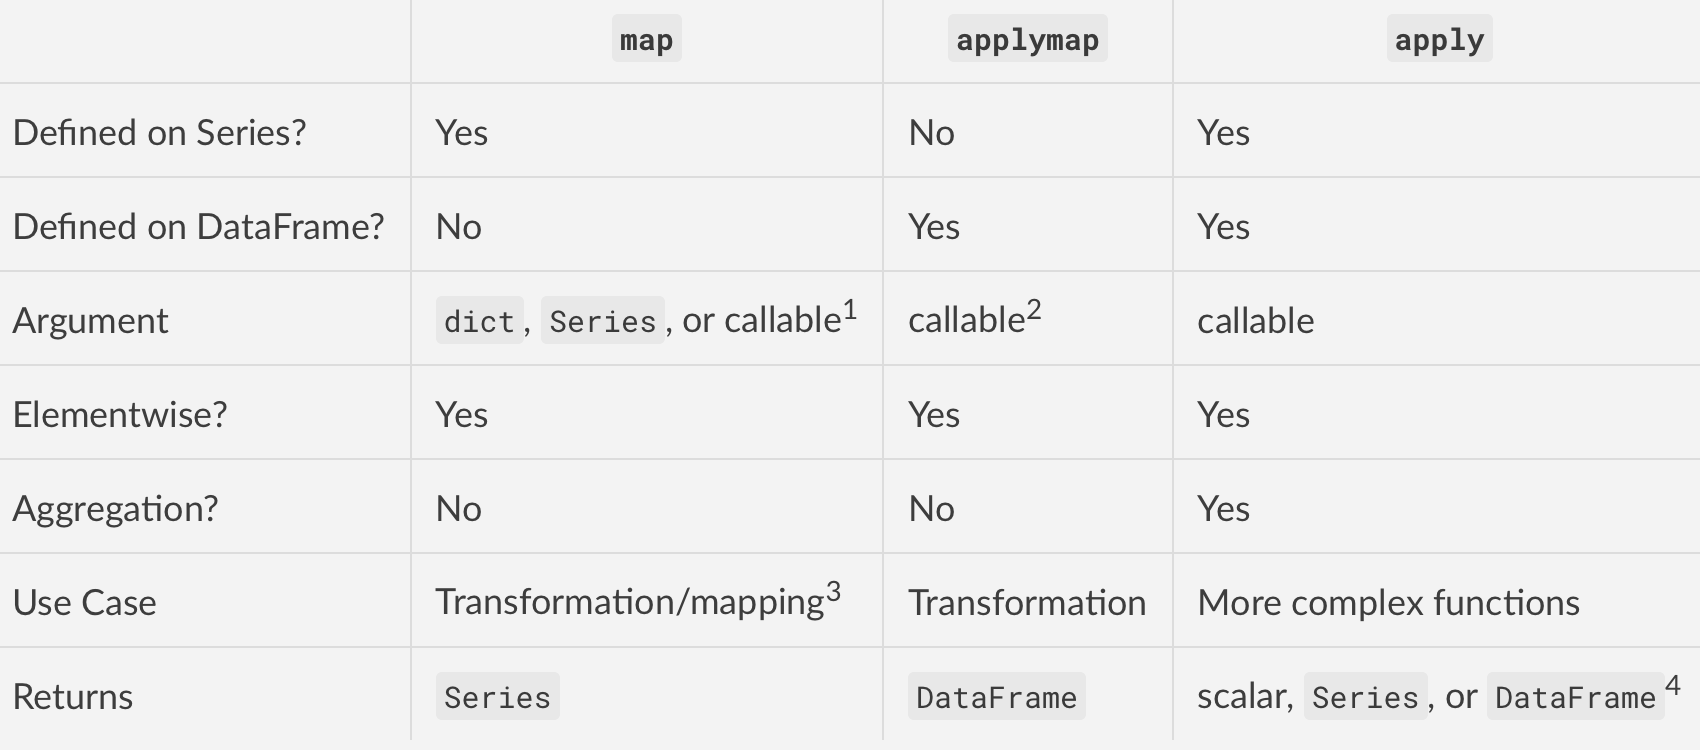

# **.map()**
# **Series.map() - df["col"].map()**

Python's map() is a built-in function that allows you to process and transform all the items in an iterable without using an explicit for loop, a technique commonly known as mapping. map() is useful when you need to apply a transformation function to each item in an iterable and transform them into a new iterable.

https://realpython.com/python-map-function/#:~:text=Python's%20map()%20is%20a,them%20into%20a%20new%20iterable.

The map() function is used to map values of Series according to input correspondence. Used for substituting each value in a Series with another value, that may be derived from a function, a dict or a Series.

map() accepts a dict or a Series. Values that are not found in the dict are converted to NaN, unless
the dict has a default value.

https://www.w3resource.com/pandas/series/series-map.php

In [86]:
df3

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


In [87]:
df3.col1.map({1:"A", 2:"B"}) # 3 ve 4 'e none atar

0      A
1      B
2    NaN
3    NaN
Name: col1, dtype: object

In [88]:
s = pd.Series(['fox', 'cow', np.nan, 'dog'])
s

0    fox
1    cow
2    NaN
3    dog
dtype: object

In [91]:
s.map("I am a {}".format)

0    I am a fox
1    I am a cow
2    I am a nan
3    I am a dog
dtype: object

In [93]:
s.map("I am a {}".format, na_action="ignore")

0    I am a fox
1    I am a cow
2           NaN
3    I am a dog
dtype: object

- **apply()** is used to apply a function along an axis of the DataFrame or on values of Series.
- **applymap()** is used to apply a function to a DataFrame elementwise.
- **map()** is used to substitute each value in a Series with another value.

https://towardsdatascience.com/introduction-to-pandas-apply-applymap-and-map-5d3e044e93ff#:~:text=apply()%20is%20used%20to,a%20Series%20with%20another%20value.

https://stackoverflow.com/questions/19798153/difference-between-map-applymap-and-apply-methods-in-pandas

# **df.transform() vs df.apply()**

# **- Both apply() and transform() can be used to manipulate the entire DataFrame.**

# - Both apply() and transform() support lambda expression. **kalın metin**

# - Both apply() and transform() can be used for manipulating a single column. **kalın metin**

In [94]:
df5 = pd.DataFrame({'A': [1,2,3], 'B': [10,20,30] })
df5


,A,B
0,1,10
1,2,20
2,3,30


In [95]:
df5.apply(lambda x: x+ 10)

,A,B
0,11,20
1,12,30
2,13,40


In [96]:
df5.transform(lambda x: x+ 10) # ikisi de aynı işi yaptı 

,A,B
0,11,20
1,12,30
2,13,40


In [97]:
df5['B_ap'] = df5['B'].apply(lambda x: x+10)
df5['B_tr'] = df5['B'].transform(lambda x: x+10)    # ikisi de aynı işlemi yağtı
df5

,A,B,B_ap,B_tr
0,1,10,20,20
1,2,20,30,30
2,3,30,40,40


# **Differences between .apply() and .transform() when manupulating data**
(1) transform() works with function, a string function, a list of functions, and a dict. However, apply() is only allowed with function.

(2) transform() cannot produce aggregated results.

(3) apply() works with multiple Series at a time. But, transform() is only allowed to work with a single Series at a time.

In [99]:
df5 = df5[["A", "B"]]
df5

,A,B
0,1,10
1,2,20
2,3,30


In [100]:
df5.transform("sqrt")
# df5.apply("sqrt")              # hata verir

,A,B
0,1.000000,3.162278
1,1.414214,4.472136
2,1.732051,5.477226


In [102]:
df5.transform(np.sqrt)

,A,B
0,1.000000,3.162278
1,1.414214,4.472136
2,1.732051,5.477226


In [103]:
df5.apply(np.sqrt) # ikisinde de çalışır

,A,B
0,1.000000,3.162278
1,1.414214,4.472136
2,1.732051,5.477226


In [104]:
df5.transform([np.sqrt, np.exp])
#df5.apply([np.sqrt, np.exp])

A                    B              
       sqrt        exp      sqrt           exp
0  1.000000   2.718282  3.162278  2.202647e+04
1  1.414214   7.389056  4.472136  4.851652e+08
2  1.732051  20.085537  5.477226  1.068647e+13

In [105]:
df5.apply([np.sqrt, np.exp])

A                    B              
       sqrt        exp      sqrt           exp
0  1.000000   2.718282  3.162278  2.202647e+04
1  1.414214   7.389056  4.472136  4.851652e+08
2  1.732051  20.085537  5.477226  1.068647e+13

In [106]:
df5.transform({'A': np.sqrt, 'B': np.exp})
#df5.apply({'A': np.sqrt, 'B': np.exp})

,A,B
0,1.000000,2.202647e+04
1,1.414214,4.851652e+08
2,1.732051,1.068647e+13


In [107]:
df5.apply({'A': np.sqrt, 'B': np.exp})

,A,B
0,1.000000,2.202647e+04
1,1.414214,4.851652e+08
2,1.732051,1.068647e+13


In [108]:
df5.apply(lambda x: x["B"]-x["A"], axis=1)
# df5.transform(lambda x: x["B"]-x["A"], axis=1) # gives an error

0     9
1    18
2    27
dtype: int64

In [109]:
df5.apply(lambda x: x.sum())
# df5.transform(lambda x:x.sum()) # gives an error sütun bazında  işlem yapmaz

A     6
B    60
dtype: int64

# **Differences Between .apply() and .transform() when using them in conjunction with groupby()**
# (1) transform() returns a DataFrame that has the same length as the input
# Yeni Bölüm
# (2) apply() works with multiple Series at a time. But, transform() is only allowed to work with a single Series at a time.

In [110]:
df6 = pd.DataFrame({'key': ['a','b','c'] * 3,
                    'A': np.arange(9),
                    'B': [1,2,3] * 3})
df6

,key,A,B
0,a,0,1
1,b,1,2
2,c,2,3
3,a,3,1
4,b,4,2
5,c,5,3
6,a,6,1
7,b,7,2
8,c,8,3


In [111]:
from pandas.core.groupby import groupby
df6.groupby("key")["A"].sum()

key
a     9
b    12
c    15
Name: A, dtype: int64

In [112]:
df6.groupby("key")["A"].apply(lambda x: x.sum()) # groupby ile apply kullanmak çok kullanılışklı değişl

key
a     9
b    12
c    15
Name: A, dtype: int64

In [113]:
df6.groupby("key")["A"].transform(lambda x: x.sum()) # transform  da döndürüyoor

0     9
1    12
2    15
3     9
4    12
5    15
6     9
7    12
8    15
Name: A, dtype: int64

In [114]:
df6 = pd.DataFrame({'key': ['a','b','c'] * 3,
                    'A': np.arange(9),
                    'B': [1,2,3] * 3})
df6

,key,A,B
0,a,0,1
1,b,1,2
2,c,2,3
3,a,3,1
4,b,4,2
5,c,5,3
6,a,6,1
7,b,7,2
8,c,8,3


In [115]:
df6.groupby('key').apply(lambda x: x["B"]-x["A"])
# df6.groupby('key').transform(lambda x: x["B"]-x["A"]) # gives an error

key   
a    0    1
     3   -2
     6   -5
b    1    1
     4   -2
     7   -5
c    2    1
     5   -2
     8   -5
dtype: int64

In [ ]:
# df6.groupby('key').transform(lambda x: x["B"]-x["A"]) # tek bir seri işlem yapar

# **pivot() vs pivot_table()**

- Pivot_table is a generalization of pivot that can handle duplicate values for one pivoted index/column pair.

- Pivot_table will only allow numeric types as "values=", whereas pivot will take string types as "values=".

- Pivot_table also supports using multiple columns for the index. 

In [117]:
data = {'gender':['male', 'female', 'female', 'male', 'female', 'male'],
        'sport':['tennis', 'tennis', 'basketball', 'football', 'voleyball', 'basketball'],
        'status':["professional","professional","professional","amateur","amateur","amateur"],
        'age':[20, 24, 26, 23, 22, 21],
        'height':[185, 172, 175, 178, 182, 196],
        'weight':[83, 58, 62, 80, 65, 90]}
df7 = pd.DataFrame(data)
df7

,gender,sport,status,age,height,weight
0,male,tennis,professional,20,185,83
1,female,tennis,professional,24,172,58
2,female,basketball,professional,26,175,62
3,male,football,amateur,23,178,80
4,female,voleyball,amateur,22,182,65
5,male,basketball,amateur,21,196,90


In [118]:
df7.pivot_table(index='gender',
                columns='sport',
                values=['age'],
                aggfunc='mean')

age                          
sport  basketball football tennis voleyball
gender                                     
female       26.0      NaN   24.0      22.0
male         21.0     23.0   20.0       NaN

In [120]:
df7.pivot(index='gender',
          columns='sport',
          values=['age'])

age                          
sport  basketball football tennis voleyball
gender                                     
female       26.0      NaN   24.0      22.0
male         21.0     23.0   20.0       NaN

In [121]:
df7.pivot(index='gender',
          columns='sport',
          values='status')  # values string bir ifadedir

sport,basketball,football,tennis,voleyball
gender,,,,
female,professional,NaN,professional,amateur
male,amateur,amateur,professional,NaN


In [ ]:
# df7.pivot_table(index='gender',
    #      columns='sport',
     #     values='status') # string değer kullanamadı

In [123]:
df7.loc[2,"sport"] = "tennis"
df7

,gender,sport,status,age,height,weight
0,male,tennis,professional,20,185,83
1,female,tennis,professional,24,172,58
2,female,tennis,professional,26,175,62
3,male,football,amateur,23,178,80
4,female,voleyball,amateur,22,182,65
5,male,basketball,amateur,21,196,90


In [124]:
df7.pivot_table(index='gender',
                columns='sport',
                values=['age','height','weight'],
                aggfunc='mean')

age                  ...   weight                 
sport  basketball football tennis  ... football tennis voleyball
gender                             ...                          
female        NaN      NaN   25.0  ...      NaN   60.0      65.0
male         21.0     23.0   20.0  ...     80.0   83.0       NaN

[2 rows x 12 columns]

In [125]:
df7.pivot_table(index='gender',
                columns='sport',
                values=['age','height','weight'],
                aggfunc='sum')

age                  ...   weight                 
sport  basketball football tennis  ... football tennis voleyball
gender                             ...                          
female        NaN      NaN   50.0  ...      NaN  120.0      65.0
male         21.0     23.0   20.0  ...     80.0   83.0       NaN

[2 rows x 12 columns]

In [126]:
#df7.pivot(index='gender',
 #               columns='sport',
  #              values=['age','height','weight']) hata verir

ValueError: ignored

In [127]:
df7.pivot( columns='sport',
            values=['age','height','weight'])

age                            ...     weight                          
sport basketball football tennis voleyball  ... basketball football tennis voleyball
0            NaN      NaN   20.0       NaN  ...        NaN      NaN   83.0       NaN
1            NaN      NaN   24.0       NaN  ...        NaN      NaN   58.0       NaN
2            NaN      NaN   26.0       NaN  ...        NaN      NaN   62.0       NaN
3            NaN     23.0    NaN       NaN  ...        NaN     80.0    NaN       NaN
4            NaN      NaN    NaN      22.0  ...        NaN      NaN    NaN      65.0
5           21.0      NaN    NaN       NaN  ...       90.0      NaN    NaN       NaN

[6 rows x 12 columns]

In [128]:
df7.groupby(["gender","sport"]).mean()

age  height  weight
gender sport                           
female tennis      25.0   173.5    60.0
       voleyball   22.0   182.0    65.0
male   basketball  21.0   196.0    90.0
       football    23.0   178.0    80.0
       tennis      20.0   185.0    83.0

In [129]:
df7.pivot_table(index=['gender', 'sport'],
                values=['age','height','weight'],
                aggfunc='mean')

age  height  weight
gender sport                          
female tennis       25   173.5      60
       voleyball    22   182.0      65
male   basketball   21   196.0      90
       football     23   178.0      80
       tennis       20   185.0      83

# **stack() & .unstack()**

Reshaping the data using stack() function in pandas converts the data into stacked format .i.e. the column is stacked row wise. When more than one column header is present we can stack the specific column header by specified the level. unstack() function in pandas converts the data into unstacked format.

https://www.datasciencemadesimple.com/reshape-using-stack-unstack-function-pandas-python/

**why and when should use a stack() and unstack() methods?**

https://stackoverflow.com/questions/69139030/why-and-when-should-use-a-stack-and-unstack-methods

In [130]:
df7


,gender,sport,status,age,height,weight
0,male,tennis,professional,20,185,83
1,female,tennis,professional,24,172,58
2,female,tennis,professional,26,175,62
3,male,football,amateur,23,178,80
4,female,voleyball,amateur,22,182,65
5,male,basketball,amateur,21,196,90


In [131]:
df7["level"] = ["high", "high", "low", "high", "low", "low"]
df7

,gender,sport,status,age,height,weight,level
0,male,tennis,professional,20,185,83,high
1,female,tennis,professional,24,172,58,high
2,female,tennis,professional,26,175,62,low
3,male,football,amateur,23,178,80,high
4,female,voleyball,amateur,22,182,65,low
5,male,basketball,amateur,21,196,90,low


In [132]:
df8 = df7.pivot_table(index=['gender','sport'],
                columns=["status","level"],
                values=['age','height','weight'],
                aggfunc='mean')
df8

age                     ...  weight                   
status            amateur       professional  ... amateur professional      
level                high   low         high  ...     low         high   low
gender sport                                  ...                           
female tennis         NaN   NaN         24.0  ...     NaN         58.0  62.0
       voleyball      NaN  22.0          NaN  ...    65.0          NaN   NaN
male   basketball     NaN  21.0          NaN  ...    90.0          NaN   NaN
       football      23.0   NaN          NaN  ...     NaN          NaN   NaN
       tennis         NaN   NaN         20.0  ...     NaN         83.0   NaN

[5 rows x 12 columns]

In [133]:
df8.stack() # sütundan indexe kaydırma yapar

age               ...  weight             
status                  amateur professional  ... amateur professional
gender sport      level                       ...                     
female tennis     high      NaN         24.0  ...     NaN         58.0
                  low       NaN         26.0  ...     NaN         62.0
       voleyball  low      22.0          NaN  ...    65.0          NaN
male   basketball low      21.0          NaN  ...    90.0          NaN
       football   high     23.0          NaN  ...    80.0          NaN
       tennis     high      NaN         20.0  ...     NaN         83.0

[6 rows x 6 columns]

In [134]:
df8.stack(level=-1) # default -1

age               ...  weight             
status                  amateur professional  ... amateur professional
gender sport      level                       ...                     
female tennis     high      NaN         24.0  ...     NaN         58.0
                  low       NaN         26.0  ...     NaN         62.0
       voleyball  low      22.0          NaN  ...    65.0          NaN
male   basketball low      21.0          NaN  ...    90.0          NaN
       football   high     23.0          NaN  ...    80.0          NaN
       tennis     high      NaN         20.0  ...     NaN         83.0

[6 rows x 6 columns]

In [135]:
df8.stack(level=1)  # 

age       height        weight      
level                           high   low   high    low   high   low
gender sport      status                                             
female tennis     professional  24.0  26.0  172.0  175.0   58.0  62.0
       voleyball  amateur        NaN  22.0    NaN  182.0    NaN  65.0
male   basketball amateur        NaN  21.0    NaN  196.0    NaN  90.0
       football   amateur       23.0   NaN  178.0    NaN   80.0   NaN
       tennis     professional  20.0   NaN  185.0    NaN   83.0   NaN

In [136]:
df8.stack(level=2) 

age               ...  weight             
status                  amateur professional  ... amateur professional
gender sport      level                       ...                     
female tennis     high      NaN         24.0  ...     NaN         58.0
                  low       NaN         26.0  ...     NaN         62.0
       voleyball  low      22.0          NaN  ...    65.0          NaN
male   basketball low      21.0          NaN  ...    90.0          NaN
       football   high     23.0          NaN  ...    80.0          NaN
       tennis     high      NaN         20.0  ...     NaN         83.0

[6 rows x 6 columns]

In [137]:
df8.stack(level=-2) 

age       height        weight      
level                           high   low   high    low   high   low
gender sport      status                                             
female tennis     professional  24.0  26.0  172.0  175.0   58.0  62.0
       voleyball  amateur        NaN  22.0    NaN  182.0    NaN  65.0
male   basketball amateur        NaN  21.0    NaN  196.0    NaN  90.0
       football   amateur       23.0   NaN  178.0    NaN   80.0   NaN
       tennis     professional  20.0   NaN  185.0    NaN   83.0   NaN

In [138]:
df8.stack(level=0) 

status                   amateur        professional       
level                       high    low         high    low
gender sport                                               
female tennis     age        NaN    NaN         24.0   26.0
                  height     NaN    NaN        172.0  175.0
                  weight     NaN    NaN         58.0   62.0
       voleyball  age        NaN   22.0          NaN    NaN
                  height     NaN  182.0          NaN    NaN
                  weight     NaN   65.0          NaN    NaN
male   basketball age        NaN   21.0          NaN    NaN
                  height     NaN  196.0          NaN    NaN
                  weight     NaN   90.0          NaN    NaN
       football   age       23.0    NaN          NaN    NaN
                  height   178.0    NaN          NaN    NaN
                  weight    80.0    NaN          NaN    NaN
       tennis     age        NaN    NaN         20.0    NaN
                  height     NaN    NaN        185.0    NaN
                  weight     NaN    NaN         83.0    NaN

In [ ]:
#   0   -3
#   1   -2
#   2   -1

In [139]:
df8.stack().stack()

age  height  weight
gender sport      level status                            
female tennis     high  professional  24.0   172.0    58.0
                  low   professional  26.0   175.0    62.0
       voleyball  low   amateur       22.0   182.0    65.0
male   basketball low   amateur       21.0   196.0    90.0
       football   high  amateur       23.0   178.0    80.0
       tennis     high  professional  20.0   185.0    83.0

In [140]:
df8.stack().stack().stack()

gender  sport       level  status              
female  tennis      high   professional  age        24.0
                                         height    172.0
                                         weight     58.0
                    low    professional  age        26.0
                                         height    175.0
                                         weight     62.0
        voleyball   low    amateur       age        22.0
                                         height    182.0
                                         weight     65.0
male    basketball  low    amateur       age        21.0
                                         height    196.0
                                         weight     90.0
        football    high   amateur       age        23.0
                                         height    178.0
                                         weight     80.0
        tennis      high   professional  age        20.0
                                        

In [144]:
pd.DataFrame(df8.stack().stack().stack())

0
gender sport      level status                    
female tennis     high  professional age      24.0
                                     height  172.0
                                     weight   58.0
                  low   professional age      26.0
                                     height  175.0
                                     weight   62.0
       voleyball  low   amateur      age      22.0
                                     height  182.0
                                     weight   65.0
male   basketball low   amateur      age      21.0
                                     height  196.0
                                     weight   90.0
       football   high  amateur      age      23.0
                                     height  178.0
                                     weight   80.0
       tennis     high  professional age      20.0
                                     height  185.0
                                     weight   83.0

In [145]:
df8.unstack(level=0)

age                     ...       weight                  
status     amateur                     ... professional                  
level         high          low        ...         high          low     
gender      female  male female  male  ...       female  male female male
sport                                  ...                               
basketball     NaN   NaN    NaN  21.0  ...          NaN   NaN    NaN  NaN
football       NaN  23.0    NaN   NaN  ...          NaN   NaN    NaN  NaN
tennis         NaN   NaN    NaN   NaN  ...         58.0  83.0   62.0  NaN
voleyball      NaN   NaN   22.0   NaN  ...          NaN   NaN    NaN  NaN

[4 rows x 24 columns]

In [146]:
df8.unstack(level=1)

age                  ...       weight                 
status    amateur                  ... professional                 
level        high                  ...          low                 
sport  basketball football tennis  ...     football tennis voleyball
gender                             ...                              
female        NaN      NaN    NaN  ...          NaN   62.0       NaN
male          NaN     23.0    NaN  ...          NaN    NaN       NaN

[2 rows x 48 columns]

In [148]:
df8.unstack(level=-1)

age                  ...       weight                 
status    amateur                  ... professional                 
level        high                  ...          low                 
sport  basketball football tennis  ...     football tennis voleyball
gender                             ...                              
female        NaN      NaN    NaN  ...          NaN   62.0       NaN
male          NaN     23.0    NaN  ...          NaN    NaN       NaN

[2 rows x 48 columns]

In [150]:
df8.unstack(level=1, fill_value="-")

age                  ...       weight                 
status    amateur                  ... professional                 
level        high                  ...          low                 
sport  basketball football tennis  ...     football tennis voleyball
gender                             ...                              
female          -        -    NaN  ...            -     62       NaN
male          NaN       23    NaN  ...          NaN    NaN         -

[2 rows x 48 columns]